In [111]:
import pandas as pd
import numpy as np
import seaborn as sn
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt


In [112]:
data=pd.read_csv(r'C:\Users\user\Downloads\delivery_time.csv')

In [113]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


E:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

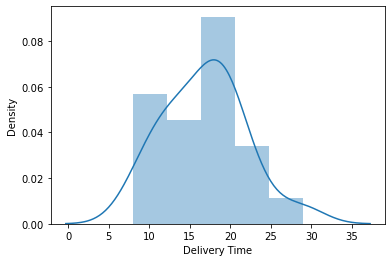

In [115]:
sn.distplot(data['Delivery Time'])

In [116]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [117]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

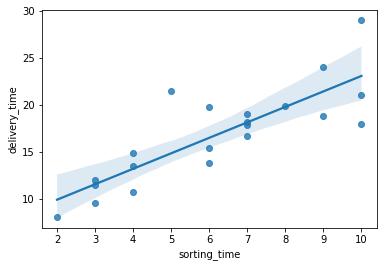

In [118]:
sn.regplot(x=data['sorting_time'],y=data['delivery_time'])

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

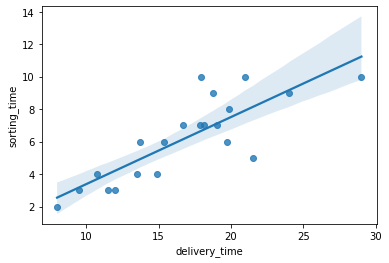

In [119]:
sn.regplot(x=data['delivery_time'],y=data['sorting_time'])

In [121]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [122]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [123]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [124]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [125]:
delivery_time=(6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [126]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [127]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [128]:
model.predict(data_pred)


0    14.827833
1    19.774893
dtype: float64

# Transforming variables for accuracy

In [129]:
model2 = smf.ols('delivery_time~np.log(sorting_time)',data=data).fit()

In [130]:
model2.params     

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [131]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           2.64e-06
Time:                        16:38:56   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
print(model2.conf_int(0.01)) # 99% confidence level

                             0          1
Intercept            -5.862666   8.182033
np.log(sorting_time)  5.115458  12.971369


In [133]:
pred2 = model2.predict(pd.DataFrame(data['sorting_time']))

In [134]:
pred2.corr(data.delivery_time)

0.8339325279256244

In [135]:
# pred2 = model2.predict(data.iloc[:,0])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'DELIVERY')

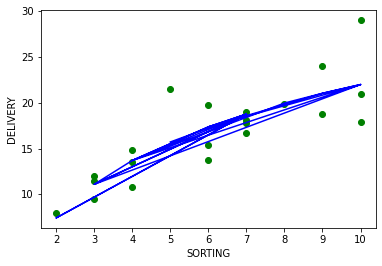

In [136]:
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green')
plt.plot(data['sorting_time'],pred2,color='blue')
plt.xlabel('SORTING');plt.ylabel('DELIVERY')


# Exponential transformation

In [137]:
model3 = smf.ols('np.log(delivery_time)~sorting_time',data=data).fit()

In [138]:
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [139]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 13 Sep 2022   Prob (F-statistic):           1.59e-06
Time:                           16:39:05   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
print(model3.conf_int(0.01)) # 99% confidence level

                     0         1
Intercept     1.826774  2.415969
sorting_time  0.061378  0.149725


In [141]:
pred_log = model3.predict(pd.DataFrame(data['sorting_time']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [142]:
pred3=np.exp(pred_log)       # as we have used log(AT) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [143]:
pred3.corr(data.delivery_time)

0.808578010828926

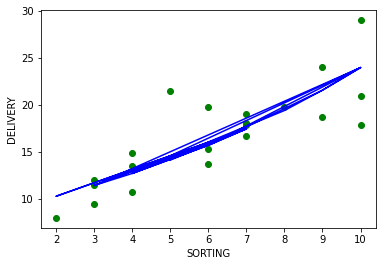

In [144]:
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green')
plt.plot(data.sorting_time,np.exp(pred_log),color='blue')
plt.xlabel('SORTING');plt.ylabel('DELIVERY')
resid_3 = pred3-data.delivery_time